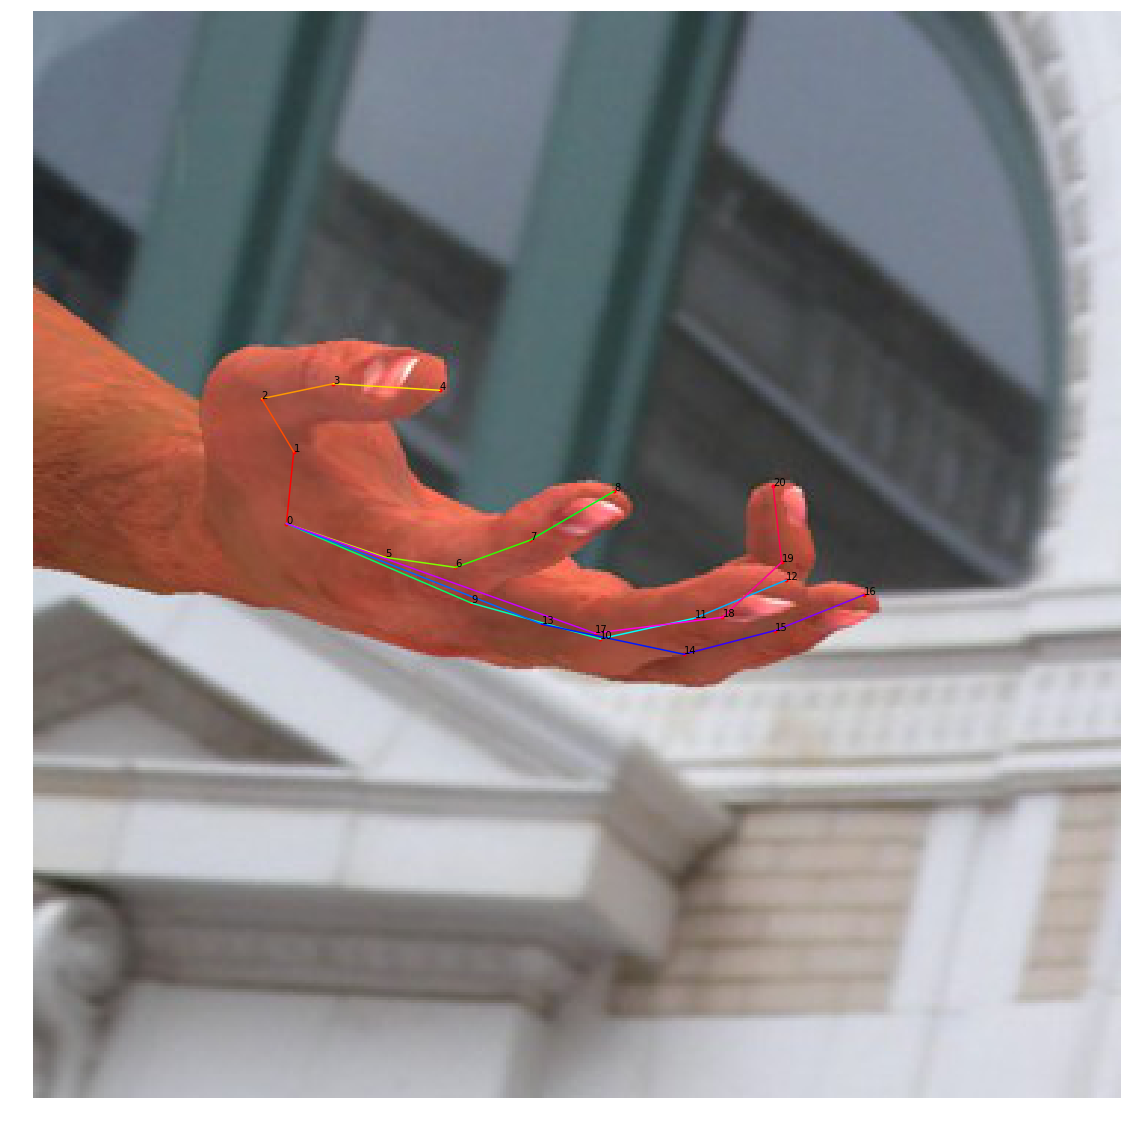

In [11]:
import os
import os.path
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

edges = [[0,1],[1,2],[2,3],[3,4],[0,5],[5,6],[6,7],[7,8],[0,9],[9,10],[10,11],[11,12],[0,13],[13,14],[14,15],[15,16],[0,17],[17,18],[18,19],[19,20]]

outpath = './output_viz/'
if not os.path.isdir(outpath):
    os.makedirs(outpath)

# Input data paths
paths = ['synth1/', 'synth2/', 'synth3', 'synth4']
paths = ['../hand_labels_synth/synth2/', '../hand_labels_synth/synth3/']
inpath = paths[0]

# files contain the 00000001.json - 00003243.json files sorted
files = sorted([f for f in os.listdir(inpath) if f.endswith('.json')])

for f in files[0:1]:
    # inpath+f = ../hand_labels_synth/synth2/00003242.json
    with open(inpath+f, 'r') as fid:
        # dat is a dictionary of { 'hand_pts' : [int,int,[0,1]], 
        #                          'is_left'  : [0,1] }
        dat = json.load(fid)
        

    # Each file contains 1 hand annotation, with 21 points in
    # 'hand_pts' of size 21x3, following this scheme:
    # https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/doc/output.md#hand-output-format
    # The 3rd column is 1 if valid:
    
    # pts contains the 21 points in the hand (pulled from the json file)
    pts = np.array(dat['hand_pts'])
    # invalid 
    invalid = pts[:,2]!=1
    
    # Left hands are marked, but otherwise follow the same point order
    is_left = dat['is_left']

    dat['hand_pts'] = pts.tolist()

    # Plot annotations
    plt.clf()
    im = plt.imread(inpath+f[0:-5]+'.jpg')
    plt.imshow(im)
    for p in range(pts.shape[0]):
        if pts[p,2]!=0:
            plt.plot(pts[p,0], pts[p,1],'r.')
            plt.text(pts[p,0], pts[p,1], '{0}'.format(p))
    for ie, e in enumerate(edges):
        if np.all(pts[e,2]!=0):
            rgb = matplotlib.colors.hsv_to_rgb([ie/float(len(edges)),1.0,1.0])
            plt.plot(pts[e,0],pts[e,1],color=rgb)
    if is_left:
        plt.text(10, 30, 'left', color='r', fontsize=24)

    # These fields are only present in manual annotations.
    # head_box (or head_size) is used to normalize size wrt. MPII head size for testing
    if 'head_box' in dat:
        head_box = np.array(dat['head_box'])
        head_size = dat['head_size']
        bpts = np.array(dat['mpii_body_pts'])

        for p in range(bpts.shape[0]):
            plt.plot(bpts[p,0], bpts[p,1],'g.',ms=10)
            plt.text(bpts[p,0], bpts[p,1], '{0}'.format(p), color='w')
        plt.plot(head_box[0,0], head_box[0,1],'b*',ms=10)
        plt.plot(head_box[1,0], head_box[1,1],'b*',ms=10)
        plt.plot(head_box[0:2,0], head_box[[0,0],1],'b')
        plt.plot(head_box[0:2,0], head_box[[1,1],1],'b')
        plt.plot(head_box[[0,0],0], head_box[0:2,1],'b')        
        plt.plot(head_box[[1,1],0], head_box[0:2,1],'b')                

    plt.axis('off')
    plt.savefig(outpath+f[0:-5]+'.jpg', bbox_inches='tight')